In [1]:
! pip install pyxlsb
! sudo apt-get install -y fonts-nanum
! sudo fc-cache -fv
! rm ~/.cache/matplotlib -rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/u

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import plotly.express as px
import seaborn as sns

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv('도로교통공단_사망 교통사고 정보_20211231.csv')

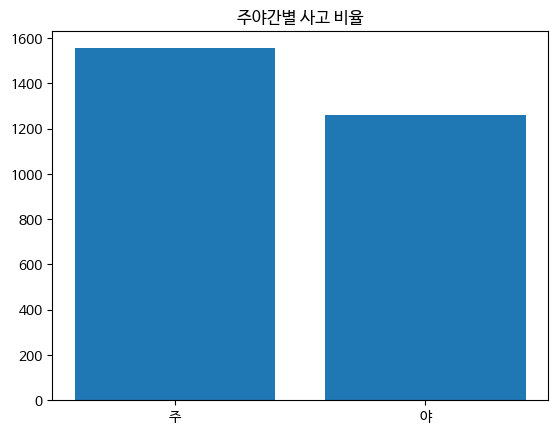

In [4]:
#주 야간 사고 빈도
day_night = df["주야"]
day = day_night[day_night == "주"]
night = day_night[day_night == "야"]
plt.bar(["주", "야"], [len(day), len(night)])
plt.title("주야간별 사고 비율")
plt.show()


In [18]:
#주간만 표시하게
day_df = df[df["주야"] == "주"]

In [6]:
day_df

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
1,2021,2021-01-01 9:00,주,금,1,0,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842
9,2021,2021-01-02 7:00,주,토,1,0,0,0,0,서울,...,횡단중,신호위반,교차로,교차로횡단보도내,화물차,보행자,953176.5,1956468.8,126.969511,37.606452
10,2021,2021-01-02 9:00,주,토,1,1,1,0,0,경북,...,측면충돌,교차로 통행방법 위반,교차로,교차로내,화물차,승합차,1101453.0,1869467.0,128.637501,36.817961
15,2021,2021-01-03 12:00,주,일,1,0,0,0,0,서울,...,횡단중,신호위반,교차로,교차로횡단보도내,승합차,보행자,955751.0,1953865.7,126.998835,37.583118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2802,2021,2021-12-30 17:00,주,목,1,1,1,0,0,전남,...,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,건설기계,947567.0,1635613.0,126.927394,34.713561
2809,2021,2021-12-31 7:00,주,금,1,0,0,0,0,대전,...,횡단중,기타,단일로,기타단일로,승용차,보행자,990105.0,1817360.0,127.389717,36.353603
2810,2021,2021-12-31 11:00,주,금,1,1,0,1,0,부산,...,기타,신호위반,교차로,교차로내,이륜차,이륜차,1136096.0,1678718.0,128.993095,35.094415
2811,2021,2021-12-31 16:00,주,금,1,0,0,0,0,경북,...,정면충돌,안전운전 의무 불이행,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434


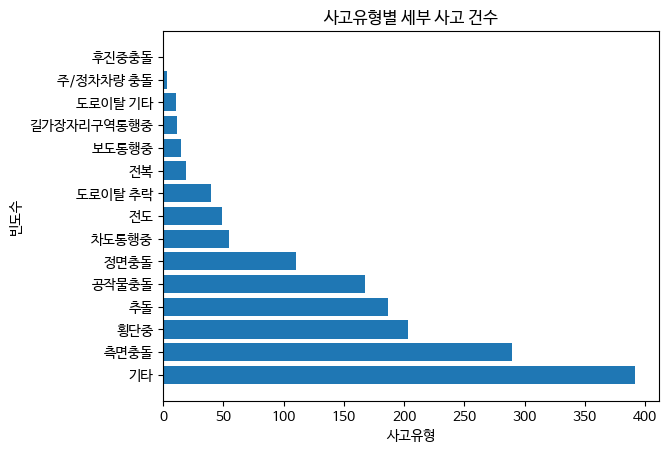

In [9]:
counts1 = day_df['사고유형'].value_counts()

# 막대 그래프 생성
plt.barh(counts1.index, counts1.values)

# 그래프 제목과 축 레이블 설정
plt.title('사고유형별 세부 사고 건수')
plt.xlabel('사고유형')
plt.ylabel('빈도수')

# 그래프 출력
plt.show()

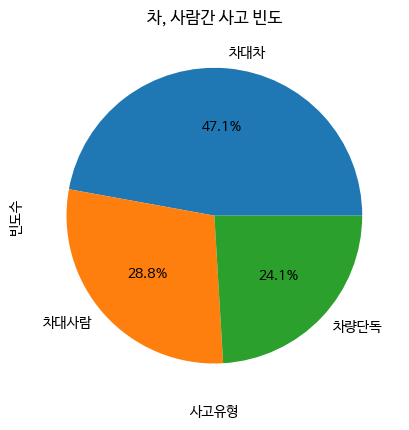

In [14]:
# pie
counts2 = day_df['사고유형_대분류'].value_counts()

plt.pie(counts2.values, labels=counts2.index, autopct='%1.1f%%')

plt.title('차, 사람간 사고 빈도')
plt.xlabel('사고유형')
plt.ylabel('빈도수')
plt.show()


In [15]:
#기타표시된 경우를 제외
nonna_df1 = day_df[day_df['사고유형'] != '기타']
nonna_df1 = nonna_df1[nonna_df1['가해자법규위반'] != '기타']

In [16]:
#사고유형별 빈도 세분화
sunburst_data = nonna_df1.groupby(['사고유형_대분류', '사고유형_중분류']).size().reset_index(name='count')
fig = px.sunburst(sunburst_data, path=['사고유형_대분류', '사고유형_중분류'], values='count')
fig.update_layout(title="사고유형별 빈도 세분화")
fig.show()

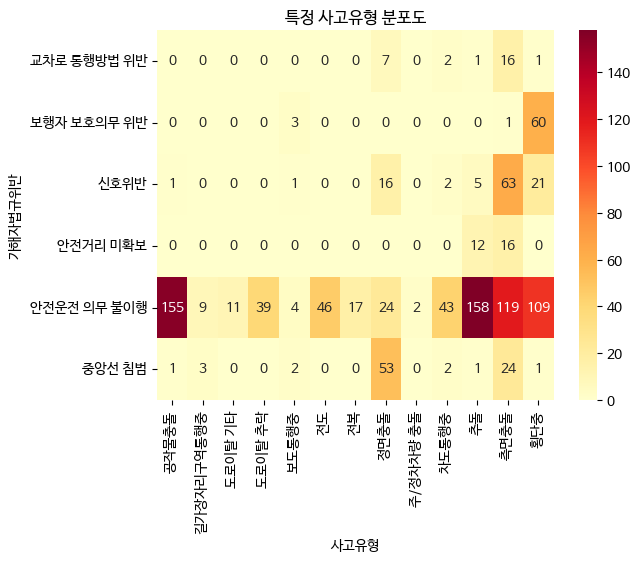

In [17]:
# 특정 법규위반에 의한 사고 유형 분포도
heatmap_data = nonna_df1[['가해자법규위반', '사고유형']]
heatmap_table = pd.crosstab(heatmap_data['가해자법규위반'], heatmap_data['사고유형'])
sns.heatmap(heatmap_table, cmap='YlOrRd', annot=True, fmt='d')
plt.title("특정 사고유형 분포도")
plt.show()